In [37]:
from gwpy.timeseries import TimeSeries
%matplotlib inline

In [11]:
import imp
asd2=imp.load_source('asd2','../../src/forks/detchar/lib/asd2.py')

In [6]:
dofs=['UL','UR','LL','LR']
times=zip(['ref1','test1',],
         [1168304418,1168353918])
dur=300

In [7]:
nmon={}
drive={}
for dof in dofs:
    for key,tt in times:
        nmon[(dof,key)]=TimeSeries.fetch('H1:SUS-ETMY_L2_NOISEMON_%s_OUT_DQ'%dof,tt,tt+dur)
        drive[(dof,key)]=TimeSeries.fetch('H1:SUS-ETMY_L2_MASTER_OUT_%s_DQ'%dof,tt,tt+dur)
        
emon={}
esd={}
for dof in dofs:
    for key,tt in times:
        emon[(dof,key)]=TimeSeries.fetch('H1:SUS-ETMY_L3_LVESDAMON_%s_OUT_DQ'%dof,tt,tt+dur)
        esd[(dof,key)]=TimeSeries.fetch('H1:SUS-ETMY_L3_MASTER_OUT_%s_DQ'%dof,tt,tt+dur)

### Calculate Transfer Functions

In [9]:
tf={}
for dof in dofs:
    for key,_ in times:
        tf[dof,key]=asd2.measure_tf(nmon[dof,key],drive[dof,key],df=1)

etf={}
for dof in dofs:
    for key,_ in times:
        etf[dof,key]=asd2.measure_tf(emon[dof,key],esd[dof,key],df=1)

### Do subtractions, using the reference transfer function

In [15]:
subt={}
for dof in dofs:
    for key,_ in times:
        subt[(dof,key)]=asd2.subtract(nmon[dof,key],drive[dof,key],tf[dof,'ref1'])

esubt={}
for dof in dofs:
    for key,_ in times:
        esubt[(dof,key)]=asd2.subtract(emon[dof,key],esd[dof,key],etf[dof,'ref1'])

# Checks of the ETMY L2 Coil monitor (Noisemon)

In [39]:
def test_noisemon(dof):
    p1=nmon[dof,'ref1'].asd(4,3,method='median').plot(label='Ref noisemon')
    p1.gca().plot(subt[dof,'ref1'].asd(4,3,method='median'),label='Ref subtraction')
    p1.gca().plot(subt[dof,'test1'].asd(4,3,method='median'),label='Test time')
    p1.add_legend(loc='lower left')
    p1.set_title('ETMY L2 %s Noisemon Check' % dof)

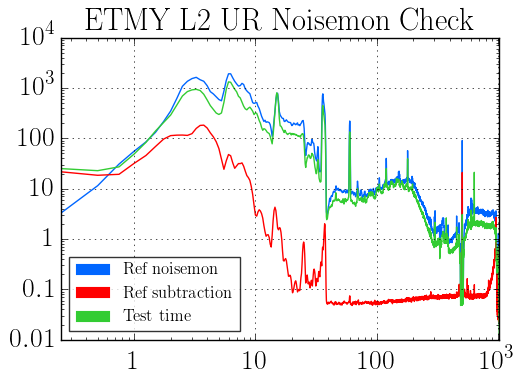

In [40]:
test_noisemon('UR')

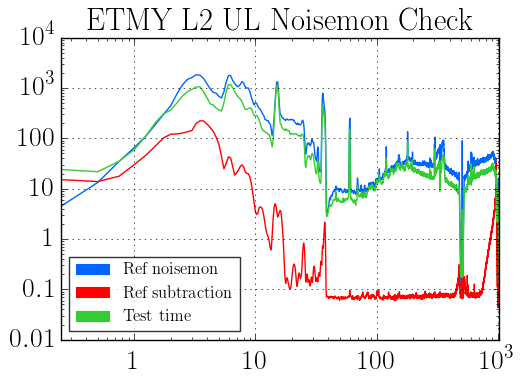

In [41]:
test_noisemon('UL')

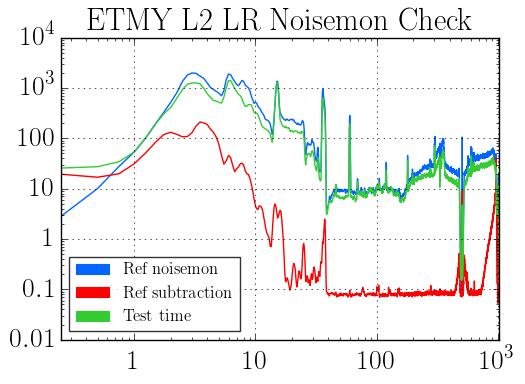

In [42]:
test_noisemon('LR')

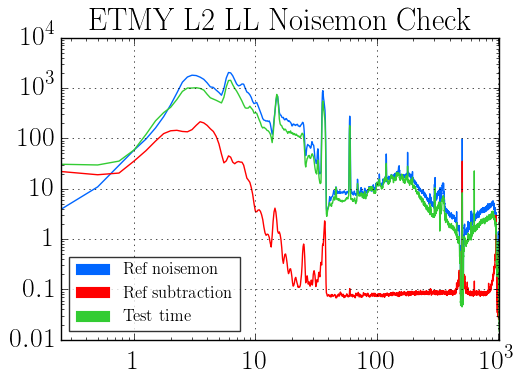

In [43]:
test_noisemon('LL')

# Checks of the ETMY L3 Low-Voltage ESD monitor

In [44]:
def test_esdamon(dof):
    p1=emon[dof,'ref1'].asd(4,3,method='median').plot(label='Ref noisemon')
    p1.gca().plot(esubt[dof,'ref1'].asd(4,3,method='median'),label='Ref subtraction')
    p1.gca().plot(esubt[dof,'test1'].asd(4,3,method='median'),label='Test time')
    p1.add_legend(loc='lower left')
    p1.set_title('ETMY L3 %s ESDmon Check' % dof)

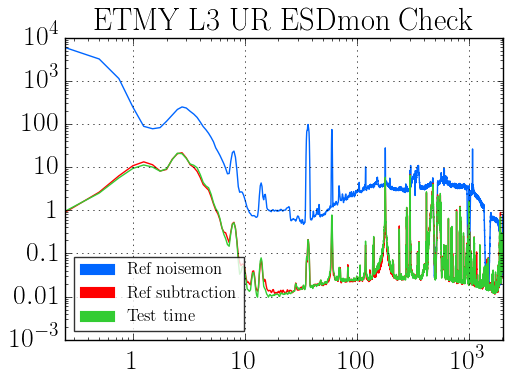

In [45]:
test_esdamon('UR')

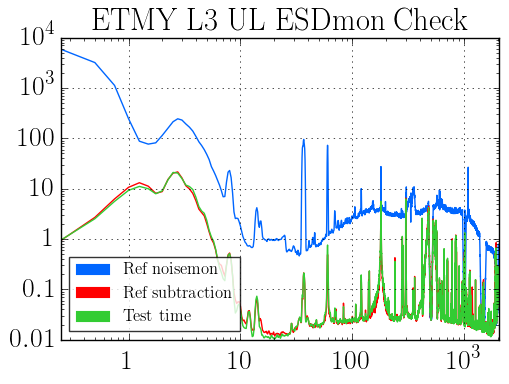

In [46]:
test_esdamon('UL')

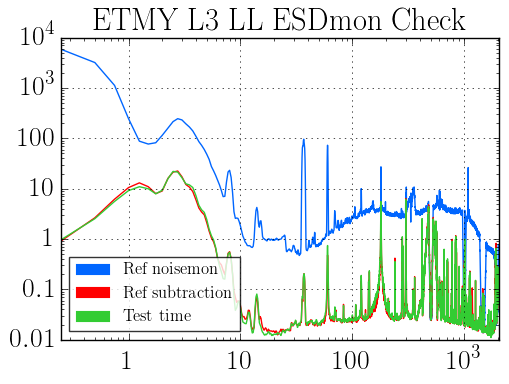

In [47]:
test_esdamon('LL')

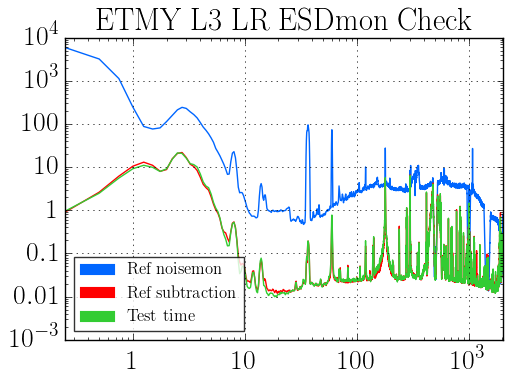

In [48]:
test_esdamon('LR')